In [2]:
!pip install optuna

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/05/3c/e9715756751e56f7df4b64c999650f418f6b48f73a824bbfe8e3604385e2/optuna-3.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/d5/d8/fc331ad9aa5f2a551042582c3ededd70ee4e72b032089b1784150a5704ac/alembic-1.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/95/df/520663eb7f7a329f7c585834b754bcc3cbcc03957d85fcbba4a2a723ad9d/colorlog-6.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for sqlalchemy>=1.3.0 from https://files.pythonhosted.org/packages/67/e7/7c77fd5290646f929b499992607cf1bc940573098a593080fcc8f7e13a08/SQLAlchemy-2.0.23-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/24/3b/11fe92d68c6a42468ddab0cf03f454419b0788fff4e91ba46b8bebafeffd/Mako-1.3.0-py3-no

In [3]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import optuna

In [4]:
import warnings
warnings.filterwarnings('ignore') # ignore warning messages

In [6]:
df = pd.read_csv('Dataset_Complete1.csv')

df = df.drop(df.columns[0], axis=1)
df = df[[c for c in df if c not in ['Likes', 'Comments']]
       + ['Likes', 'Comments']]

df

Username   Followers  Followees  Verification  Business  \
0        153.0  21664800.0        0.0           1.0       0.0   
1        153.0  21664800.0        0.0           1.0       0.0   
2        153.0  21664800.0        0.0           1.0       0.0   
3        153.0  21664800.0        0.0           1.0       0.0   
4        153.0  21664800.0        0.0           1.0       0.0   
...        ...         ...        ...           ...       ...   
2666      34.0   2996685.0      110.0           1.0       1.0   
2667      34.0   2996685.0      110.0           1.0       1.0   
2668      34.0   2996685.0      110.0           1.0       1.0   
2669      34.0   2996685.0      110.0           1.0       1.0   
2670      34.0   2996685.0      110.0           1.0       1.0   

      Business Category  Posts  Caption Token 1  Caption Token 2  \
0                   0.0   40.0             42.0          15666.0   
1                   0.0   40.0           1532.0            314.0   
2                   0.0   40.0           1169.0           8222.0   
3                   0.0   40.0             64.0           5544.0   
4                   0.0   40.0           1026.0            447.0   
...                 ...    ...              ...              ...   
2666                1.0  433.0           3666.0          12949.0   
2667                1.0  433.0            817.0           7985.0   
2668                1.0  433.0             32.0           4503.0   
2669                1.0  433.0          25082.0          23078.0   
2670                1.0  433.0           3633.0            994.0   

      Caption Token 3  ...           992           993           994  \
0              1681.0  ...  5.707139e-10  5.737810e-08  3.581643e-09   
1               547.0  ...  1.153214e-05  2.517477e-06  2.839326e-05   
2               318.0  ...  1.428277e-05  1.755920e-04  8.948331e-05   
3              2156.0  ...  1.900617e-05  1.300003e-04  2.013153e-05   
4               247.0  ...  6.807120e-12  4.441825e-10  2.101302e-10   
...               ...  ...           ...           ...           ...   
2666          24344.0  ...  3.568996e-04  5.279088e-04  7.427240e-03   
2667            306.0  ...  3.335385e-07  6.848353e-06  6.560173e-07   
2668           3011.0  ...  2.337393e-05  2.140431e-04  6.698039e-05   
2669            447.0  ...  5.226626e-06  6.195489e-05  2.007524e-05   
2670            319.0  ...  1.517229e-07  2.037010e-07  4.357723e-07   

               995           996           997           998           999  \
0     6.208434e-09  2.768166e-08  5.053451e-09  1.294469e-07  1.349951e-04   
1     9.317895e-06  1.945329e-05  1.079942e-05  4.686316e-04  1.896315e-04   
2     1.681776e-04  5.321964e-04  1.767252e-03  4.042462e-04  1.782044e-05   
3     9.770014e-05  1.236979e-04  1.917909e-05  1.311907e-04  2.890138e-05   
4     6.267626e-09  2.846517e-10  1.341658e-11  4.972645e-10  4.478504e-08   
...            ...           ...           ...           ...           ...   
2666  4.320456e-03  5.974646e-04  2.292023e-02  6.535090e-04  3.085117e-04   
2667  2.739774e-06  4.960687e-06  1.273526e-06  5.739842e-06  1.123541e-04   
2668  8.347758e-05  1.327411e-04  6.329289e-05  5.350406e-04  8.297876e-04   
2669  1.998881e-05  2.666036e-05  1.075375e-05  2.137535e-04  6.010067e-04   
2670  3.037575e-05  2.477226e-06  3.435065e-07  1.022055e-05  7.443468e-05   

          Likes  Comments  
0     4786649.0   16258.0  
1     4165277.0   15630.0  
2     4155201.0   24980.0  
3     4113889.0   26495.0  
4     4049193.0   15736.0  
...         ...       ...  
2666   234544.0     989.0  
2667   219879.0    2585.0  
2668   215286.0    5656.0  
2669   195725.0    2705.0  
2670   189337.0    1056.0  

[2671 rows x 1066 columns]

In [7]:
# List to store the results
X = []
y_like = []
y_comment = []

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    row_list = []
    for item in row[:-2]:
        if isinstance(item, list):
            # If the item is a list, extend the row_list with its elements
            row_list.extend(item)
        else:
            # Otherwise, just append the item
            row_list.append(item)
    # Append the processed row to the result list
    X.append(row_list)

y_like = df["Likes"].values.tolist()
y_comment = df["Comments"].values.tolist()

In [8]:
print(f'Lenght of X: {len(X),len(X[0])}  \nSample of X: {X[0]}\n')
print(f'Lenght of y_like: {len(y_like)} \ny_like: {y_like}\n')
print(f'Lenght of y_comment: {len(y_comment)} \ny_comment: {y_comment}')

Lenght of X: (2671, 1064)  
Sample of X: [153.0, 21664800.0, 0.0, 1.0, 0.0, 0.0, 40.0, 42.0, 15666.0, 1681.0, 290.0, 314.0, 389.0, 287.0, 1842.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 50256.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.7510497940520512e-08, 2.292930467717724e-08, 5.732641028544094e-08, 1.9400218320697604e-08, 1.8686702674131086e-07, 2.0609017781225705e-07, 2.0496226937893883e-08, 4.951336762815117e-08, 2.2646819974880827e-09, 9.027580905041075e-10, 2.978378876861143e-09, 6.824403819827295e-10, 1.0588750987139406e-09, 1.0505647463077141e-09, 8.56089588108233e-10, 3.788370506185856e-09, 1.5089659521905219e-09, 2.4868240799946756e-10, 2.922421415973986e

# Instagram Like and Comment Predictors

In [9]:
X_train_like, X_test_like, y_train_like, y_test_like = train_test_split(X, y_like, test_size=0.1, shuffle = True, random_state=100)

def objective_likes(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 100),
        "objective": trial.suggest_categorical("objective", ["reg:squarederror", "reg:squaredlogerror", "reg:absoluteerror", "reg:gamma"]),
        "eval_metric": trial.suggest_categorical("eval_metric", ["auc", "rmse", "mape", "rmsle", "logloss"]),
        "device": trial.suggest_categorical("device", ["cuda"])
    }

    model = XGBRegressor(**params, silent=True)
    model.fit(X_train_like, y_train_like)
    predictions = model.predict(X_test_like)
    mape = mean_absolute_percentage_error(y_test_like, predictions)
    return mape

study_likes = optuna.create_study(direction='minimize')
study_likes.optimize(objective_likes, n_trials=200)

# print('Best hyperparameters:', study_likes.best_params)
# print('Best MAPE score:', study_likes.best_value)

[I 2023-12-04 13:36:43,323] A new study created in memory with name: no-name-0c5bc026-0717-4924-bf32-a4f779e06f5d
[I 2023-12-04 13:36:44,399] Trial 0 finished with value: 156.06353118812362 and parameters: {'n_estimators': 371, 'learning_rate': 0.003642198711942299, 'max_depth': 1, 'subsample': 0.23695121724939122, 'colsample_bytree': 0.4229397357337302, 'min_child_weight': 15, 'objective': 'reg:squarederror', 'eval_metric': 'auc', 'device': 'cuda'}. Best is trial 0 with value: 156.06353118812362.
[I 2023-12-04 13:36:45,531] Trial 1 finished with value: 10.586141213737948 and parameters: {'n_estimators': 508, 'learning_rate': 0.00476931032906616, 'max_depth': 2, 'subsample': 0.1071261337948913, 'colsample_bytree': 0.7887234752517769, 'min_child_weight': 70, 'objective': 'reg:absoluteerror', 'eval_metric': 'rmse', 'device': 'cuda'}. Best is trial 1 with value: 10.586141213737948.
[I 2023-12-04 13:36:46,966] Trial 2 finished with value: 5.253585522629649 and parameters: {'n_estimators': 

[I 2023-12-04 13:37:27,185] Trial 21 finished with value: 0.9808242852436748 and parameters: {'n_estimators': 931, 'learning_rate': 0.0044738572873882654, 'max_depth': 8, 'subsample': 0.42699114976484864, 'colsample_bytree': 0.2149485308292514, 'min_child_weight': 5, 'objective': 'reg:gamma', 'eval_metric': 'rmsle', 'device': 'cuda'}. Best is trial 21 with value: 0.9808242852436748.
[I 2023-12-04 13:37:30,283] Trial 22 finished with value: 0.9718225847602757 and parameters: {'n_estimators': 997, 'learning_rate': 0.005166331965982033, 'max_depth': 8, 'subsample': 0.4692515401148765, 'colsample_bytree': 0.2076173953638809, 'min_child_weight': 4, 'objective': 'reg:gamma', 'eval_metric': 'rmsle', 'device': 'cuda'}. Best is trial 22 with value: 0.9718225847602757.
[I 2023-12-04 13:37:32,516] Trial 23 finished with value: 0.9870998098841307 and parameters: {'n_estimators': 786, 'learning_rate': 0.00449566834159465, 'max_depth': 6, 'subsample': 0.4177027072005314, 'colsample_bytree': 0.186019

[I 2023-12-04 13:38:20,144] Trial 43 finished with value: 0.9698964808282514 and parameters: {'n_estimators': 953, 'learning_rate': 0.006610047794316617, 'max_depth': 9, 'subsample': 0.5166739865424408, 'colsample_bytree': 0.42589853761973, 'min_child_weight': 14, 'objective': 'reg:gamma', 'eval_metric': 'rmsle', 'device': 'cuda'}. Best is trial 42 with value: 0.9503181517879363.
[I 2023-12-04 13:38:23,919] Trial 44 finished with value: 0.9841024684094716 and parameters: {'n_estimators': 963, 'learning_rate': 0.008471144250514802, 'max_depth': 9, 'subsample': 0.5494663622793794, 'colsample_bytree': 0.4140774291228412, 'min_child_weight': 14, 'objective': 'reg:gamma', 'eval_metric': 'auc', 'device': 'cuda'}. Best is trial 42 with value: 0.9503181517879363.
[I 2023-12-04 13:38:28,473] Trial 45 finished with value: 1.00211705567419 and parameters: {'n_estimators': 999, 'learning_rate': 0.006280793614902409, 'max_depth': 10, 'subsample': 0.5909953572705278, 'colsample_bytree': 0.3949017477

[I 2023-12-04 13:39:53,368] Trial 65 finished with value: 0.6003541812786708 and parameters: {'n_estimators': 734, 'learning_rate': 0.045135929664727265, 'max_depth': 10, 'subsample': 0.8411676466131377, 'colsample_bytree': 0.3050396804629583, 'min_child_weight': 48, 'objective': 'reg:gamma', 'eval_metric': 'logloss', 'device': 'cuda'}. Best is trial 59 with value: 0.5903787912639044.
[I 2023-12-04 13:39:56,839] Trial 66 finished with value: 0.6516808971120307 and parameters: {'n_estimators': 733, 'learning_rate': 0.0472663237971608, 'max_depth': 9, 'subsample': 0.8430428465390096, 'colsample_bytree': 0.29168885423924984, 'min_child_weight': 50, 'objective': 'reg:gamma', 'eval_metric': 'logloss', 'device': 'cuda'}. Best is trial 59 with value: 0.5903787912639044.
[I 2023-12-04 13:39:57,623] Trial 67 finished with value: 0.9944563171255568 and parameters: {'n_estimators': 717, 'learning_rate': 0.05615401201096215, 'max_depth': 9, 'subsample': 0.8993514440865763, 'colsample_bytree': 0.30

[I 2023-12-04 13:40:47,858] Trial 87 finished with value: 0.6033158005873305 and parameters: {'n_estimators': 487, 'learning_rate': 0.07941539294167524, 'max_depth': 8, 'subsample': 0.7629589593620378, 'colsample_bytree': 0.43983834128233784, 'min_child_weight': 88, 'objective': 'reg:gamma', 'eval_metric': 'mape', 'device': 'cuda'}. Best is trial 74 with value: 0.5451607090613896.
[I 2023-12-04 13:40:50,180] Trial 88 finished with value: 0.5515586644810045 and parameters: {'n_estimators': 535, 'learning_rate': 0.08553652205304142, 'max_depth': 7, 'subsample': 0.8163802927543689, 'colsample_bytree': 0.4674398454922876, 'min_child_weight': 76, 'objective': 'reg:gamma', 'eval_metric': 'logloss', 'device': 'cuda'}. Best is trial 74 with value: 0.5451607090613896.
[I 2023-12-04 13:40:52,658] Trial 89 finished with value: 4.521627399441338 and parameters: {'n_estimators': 529, 'learning_rate': 0.0638396782337666, 'max_depth': 7, 'subsample': 0.8197946691138351, 'colsample_bytree': 0.56723315

[I 2023-12-04 13:41:21,727] Trial 109 finished with value: 0.6532198180592746 and parameters: {'n_estimators': 316, 'learning_rate': 0.07652496906074488, 'max_depth': 5, 'subsample': 0.91794762178549, 'colsample_bytree': 0.44864690172854466, 'min_child_weight': 80, 'objective': 'reg:gamma', 'eval_metric': 'rmse', 'device': 'cuda'}. Best is trial 92 with value: 0.5232256241975638.
[I 2023-12-04 13:41:23,534] Trial 110 finished with value: 0.5696773245140994 and parameters: {'n_estimators': 472, 'learning_rate': 0.06716876587362268, 'max_depth': 6, 'subsample': 0.9670105006292578, 'colsample_bytree': 0.4087257059373806, 'min_child_weight': 73, 'objective': 'reg:gamma', 'eval_metric': 'mape', 'device': 'cuda'}. Best is trial 92 with value: 0.5232256241975638.
[I 2023-12-04 13:41:24,916] Trial 111 finished with value: 0.5282560035910039 and parameters: {'n_estimators': 353, 'learning_rate': 0.09704772403961469, 'max_depth': 6, 'subsample': 0.9227286759943697, 'colsample_bytree': 0.43245546

[I 2023-12-04 13:41:53,844] Trial 131 finished with value: 0.5644013344026165 and parameters: {'n_estimators': 329, 'learning_rate': 0.0767733049282732, 'max_depth': 5, 'subsample': 0.990363673944249, 'colsample_bytree': 0.5244227225709219, 'min_child_weight': 60, 'objective': 'reg:gamma', 'eval_metric': 'rmse', 'device': 'cuda'}. Best is trial 126 with value: 0.5126006201667708.
[I 2023-12-04 13:41:55,118] Trial 132 finished with value: 0.5543073652751905 and parameters: {'n_estimators': 352, 'learning_rate': 0.08037203076976379, 'max_depth': 5, 'subsample': 0.9875110817421133, 'colsample_bytree': 0.48213465687312423, 'min_child_weight': 61, 'objective': 'reg:gamma', 'eval_metric': 'rmse', 'device': 'cuda'}. Best is trial 126 with value: 0.5126006201667708.
[I 2023-12-04 13:41:56,707] Trial 133 finished with value: 0.5022763649636007 and parameters: {'n_estimators': 358, 'learning_rate': 0.09087899470635027, 'max_depth': 6, 'subsample': 0.9702808729736667, 'colsample_bytree': 0.538629

[I 2023-12-04 13:42:33,934] Trial 153 finished with value: 0.49933245023998096 and parameters: {'n_estimators': 486, 'learning_rate': 0.05834404194143159, 'max_depth': 7, 'subsample': 0.9960613125981752, 'colsample_bytree': 0.6260612669713349, 'min_child_weight': 52, 'objective': 'reg:gamma', 'eval_metric': 'rmse', 'device': 'cuda'}. Best is trial 144 with value: 0.46037861247321626.
[I 2023-12-04 13:42:36,290] Trial 154 finished with value: 0.4769039476331358 and parameters: {'n_estimators': 437, 'learning_rate': 0.05496918385117005, 'max_depth': 7, 'subsample': 0.9988450441349459, 'colsample_bytree': 0.6344384752150775, 'min_child_weight': 46, 'objective': 'reg:gamma', 'eval_metric': 'rmse', 'device': 'cuda'}. Best is trial 144 with value: 0.46037861247321626.
[I 2023-12-04 13:42:38,630] Trial 155 finished with value: 0.5143942566049718 and parameters: {'n_estimators': 442, 'learning_rate': 0.05498475673586922, 'max_depth': 7, 'subsample': 0.9595976155942816, 'colsample_bytree': 0.64

[I 2023-12-04 13:43:29,647] Trial 175 finished with value: 0.49319664630023907 and parameters: {'n_estimators': 563, 'learning_rate': 0.040241964677188366, 'max_depth': 7, 'subsample': 0.9338385842128113, 'colsample_bytree': 0.6984685531421087, 'min_child_weight': 43, 'objective': 'reg:gamma', 'eval_metric': 'rmse', 'device': 'cuda'}. Best is trial 159 with value: 0.4587159246029114.
[I 2023-12-04 13:43:32,631] Trial 176 finished with value: 0.4638501283560739 and parameters: {'n_estimators': 542, 'learning_rate': 0.04752411754424809, 'max_depth': 7, 'subsample': 0.9412900391992, 'colsample_bytree': 0.7066848133184273, 'min_child_weight': 39, 'objective': 'reg:gamma', 'eval_metric': 'rmse', 'device': 'cuda'}. Best is trial 159 with value: 0.4587159246029114.
[I 2023-12-04 13:43:35,606] Trial 177 finished with value: 0.4700408262331225 and parameters: {'n_estimators': 544, 'learning_rate': 0.03951477083497606, 'max_depth': 7, 'subsample': 0.9512734577553594, 'colsample_bytree': 0.705315

KeyboardInterrupt: 

In [10]:
# model_like = XGBRegressor(n_estimators = 350,
#                           learning_rate = 0.02,
#                           max_depth = 5,
#                           subsample = 0.915,
#                           colsample_bytree = 1,
#                           min_child_weight = 2,
#                           objective = 'reg:squarederror',
#                           eval_metric = 'auc',
#                           device = 'cuda')

# model_like = XGBRegressor(n_estimators = 607,
#                           learning_rate = 0.04248586454615846,
#                           max_depth = 6,
#                           subsample = 0.8825881544026494,
#                           colsample_bytree = 0.9692455588139074,
#                           min_child_weight = 11,
#                           objective = 'reg:gamma',
#                           eval_metric = 'logloss',
#                           device = 'cuda')

model_like = XGBRegressor(n_estimators = 937,
                          learning_rate = 0.05319373858101761,
                          max_depth = 7,
                          subsample = 0.9520738932354248,
                          colsample_bytree = 0.9423020222300316,
                          min_child_weight = 21,
                          objective = 'reg:gamma',
                          eval_metric = 'logloss',
                          device = 'cuda')

# cross_val_score(model_like, X, y_like, scoring="neg_mean_absolute_percentage_error", cv = 5)

X_train_like, X_test_like, y_train_like, y_test_like = train_test_split(X, y_like, test_size=0.1, shuffle = True, random_state=100)

model_like.fit(X_train_like,y_train_like)
print(f'MAPE Score for model_like: {mean_absolute_percentage_error(model_like.predict(X_test_like), y_test_like)*100} %')

MAPE Score for model_like: 40.70202699263732 %


In [11]:
X_train_comment, X_test_comment, y_train_comment, y_test_comment = train_test_split(X, y_comment, test_size=0.1, shuffle = True, random_state=100)

def objective_comments(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 100),
        "objective": trial.suggest_categorical("objective", ["reg:squarederror", "reg:squaredlogerror", "reg:absoluteerror"]),
        "eval_metric": trial.suggest_categorical("eval_metric", ["auc", "rmse", "mape", "rmsle", "logloss"]),
        "device": trial.suggest_categorical("device", ["cuda"])
    }

    model = XGBRegressor(**params, silent=True)
    model.fit(X_train_comment, y_train_comment)
    predictions = model.predict(X_test_comment)
    mape = mean_absolute_percentage_error(y_test_comment, predictions)
    return mape

study_comments = optuna.create_study(direction='minimize')
study_comments.optimize(objective_comments, n_trials=200)

# print('Best hyperparameters:', study_comments.best_params)
# print('Best MAPE score:', study_comments.best_value)

[I 2023-12-04 13:44:41,275] A new study created in memory with name: no-name-80c822f5-587e-4983-9315-39f2e0f73df9
[I 2023-12-04 13:44:41,816] Trial 0 finished with value: 2.0927991500066884e+16 and parameters: {'n_estimators': 150, 'learning_rate': 0.015258990845179503, 'max_depth': 1, 'subsample': 0.2964377216018027, 'colsample_bytree': 0.696866030944175, 'min_child_weight': 37, 'objective': 'reg:absoluteerror', 'eval_metric': 'mape', 'device': 'cuda'}. Best is trial 0 with value: 2.0927991500066884e+16.
[I 2023-12-04 13:44:42,885] Trial 1 finished with value: 4.195797419104491e+17 and parameters: {'n_estimators': 335, 'learning_rate': 0.03039977694622087, 'max_depth': 5, 'subsample': 0.5810197065606588, 'colsample_bytree': 0.6786318618117146, 'min_child_weight': 85, 'objective': 'reg:squarederror', 'eval_metric': 'mape', 'device': 'cuda'}. Best is trial 0 with value: 2.0927991500066884e+16.
[I 2023-12-04 13:44:44,477] Trial 2 finished with value: 1.1126450644210862e+18 and parameters

[I 2023-12-04 13:45:04,882] Trial 21 finished with value: 200585886427411.97 and parameters: {'n_estimators': 671, 'learning_rate': 0.0013758571908239422, 'max_depth': 4, 'subsample': 0.23807847512448793, 'colsample_bytree': 0.91233339230471, 'min_child_weight': 100, 'objective': 'reg:squaredlogerror', 'eval_metric': 'rmsle', 'device': 'cuda'}. Best is trial 14 with value: 151231724104689.6.
[I 2023-12-04 13:45:05,965] Trial 22 finished with value: 149654918210148.22 and parameters: {'n_estimators': 660, 'learning_rate': 0.0010186065787729179, 'max_depth': 3, 'subsample': 0.23122434063568822, 'colsample_bytree': 0.8099018888469323, 'min_child_weight': 81, 'objective': 'reg:squaredlogerror', 'eval_metric': 'rmsle', 'device': 'cuda'}. Best is trial 22 with value: 149654918210148.22.
[I 2023-12-04 13:45:06,848] Trial 23 finished with value: 140922151916560.16 and parameters: {'n_estimators': 592, 'learning_rate': 0.0010245821056262506, 'max_depth': 2, 'subsample': 0.1892448440706494, 'col

[I 2023-12-04 13:45:28,026] Trial 42 finished with value: 187186870543681.8 and parameters: {'n_estimators': 715, 'learning_rate': 0.0012876091112517109, 'max_depth': 5, 'subsample': 0.4310733572656094, 'colsample_bytree': 0.9978477742903293, 'min_child_weight': 59, 'objective': 'reg:squaredlogerror', 'eval_metric': 'mape', 'device': 'cuda'}. Best is trial 41 with value: 106845869370598.17.
[I 2023-12-04 13:45:28,776] Trial 43 finished with value: 97748501620522.95 and parameters: {'n_estimators': 266, 'learning_rate': 0.0013479585472593808, 'max_depth': 5, 'subsample': 0.49865613902665284, 'colsample_bytree': 0.9514641398083382, 'min_child_weight': 65, 'objective': 'reg:squaredlogerror', 'eval_metric': 'mape', 'device': 'cuda'}. Best is trial 43 with value: 97748501620522.95.
[I 2023-12-04 13:45:29,513] Trial 44 finished with value: 120057735660254.53 and parameters: {'n_estimators': 250, 'learning_rate': 0.002103162598219571, 'max_depth': 5, 'subsample': 0.5071460414042989, 'colsampl

[I 2023-12-04 13:45:42,213] Trial 63 finished with value: 87748842172844.86 and parameters: {'n_estimators': 107, 'learning_rate': 0.0025211106563909295, 'max_depth': 10, 'subsample': 0.4028208074567417, 'colsample_bytree': 0.8171293910332359, 'min_child_weight': 62, 'objective': 'reg:squaredlogerror', 'eval_metric': 'logloss', 'device': 'cuda'}. Best is trial 58 with value: 76064025062385.64.
[I 2023-12-04 13:45:42,807] Trial 64 finished with value: 131545416977026.8 and parameters: {'n_estimators': 172, 'learning_rate': 0.003380029945851116, 'max_depth': 8, 'subsample': 0.3523831577360003, 'colsample_bytree': 0.7707686165826403, 'min_child_weight': 55, 'objective': 'reg:squaredlogerror', 'eval_metric': 'logloss', 'device': 'cuda'}. Best is trial 58 with value: 76064025062385.64.
[I 2023-12-04 13:45:43,432] Trial 65 finished with value: 81317851820216.33 and parameters: {'n_estimators': 100, 'learning_rate': 0.0024394195961391376, 'max_depth': 9, 'subsample': 0.45156148148096154, 'col

[I 2023-12-04 13:45:56,418] Trial 84 finished with value: 78225080726911.02 and parameters: {'n_estimators': 162, 'learning_rate': 0.001166714406107686, 'max_depth': 10, 'subsample': 0.6177483495356443, 'colsample_bytree': 0.8015177135174816, 'min_child_weight': 13, 'objective': 'reg:squaredlogerror', 'eval_metric': 'auc', 'device': 'cuda'}. Best is trial 73 with value: 70779123895648.45.
[I 2023-12-04 13:45:57,014] Trial 85 finished with value: 78149792594501.7 and parameters: {'n_estimators': 135, 'learning_rate': 0.001390983347688175, 'max_depth': 10, 'subsample': 0.6649925548335455, 'colsample_bytree': 0.8178050016919781, 'min_child_weight': 23, 'objective': 'reg:squaredlogerror', 'eval_metric': 'auc', 'device': 'cuda'}. Best is trial 73 with value: 70779123895648.45.
[I 2023-12-04 13:45:57,724] Trial 86 finished with value: 81699320638938.72 and parameters: {'n_estimators': 195, 'learning_rate': 0.0011343447513671129, 'max_depth': 10, 'subsample': 0.602693540211972, 'colsample_byt

[W 2023-12-04 13:46:11,473] Trial 104 failed with value None.


KeyboardInterrupt: 

In [12]:
# model_comment = XGBRegressor(n_estimators = 350,
#                              learning_rate = 0.02,
#                              max_depth = 5,
#                              subsample = 0.915,
#                              colsample_bytree = 1,
#                              min_child_weight = 2,
#                              objective = 'reg:squarederror',
#                              eval_metric = 'auc',
#                              device = 'cuda')

model_comment = XGBRegressor(n_estimators = 400, #350 - 115%, 129%, 174%, 128%, 103%; 400 - 154%, 105%, 153%, 128%, 84.7%; 450 - 106%, 108%, 118%, 117%, 146%
                             learning_rate = 0.01, #increase is bad; 0.02 -> 0.01
                             max_depth = 7, #5 -> 6 => 80 - 110%; 7 => 80s %; 8 => 80 - 110%
                             subsample = 0.915, #
                             colsample_bytree = 0.7,
                             min_child_weight = 2,
                             objective = 'reg:squarederror',
                             eval_metric = 'auc',
                             device = 'cuda')


# cross_val_score(model_comment, X, y_comment, scoring="neg_mean_absolute_percentage_error", cv = 5)

X_train_comment, X_test_comment, y_train_comment, y_test_comment = train_test_split(X, y_comment, test_size=0.1, shuffle = True, random_state=100)

model_comment.fit(X_train_comment,y_train_comment)
print(f'MAPE Score for model_comment: {mean_absolute_percentage_error(model_comment.predict(X_test_comment), y_test_comment)*100} %')


MAPE Score for model_comment: 82.88158750887877 %


In [13]:
model_like_FULL = model_like
model_like_FULL.fit(X, y_like)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9423020222300316, device='cuda',
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='logloss', feature_types=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05319373858101761,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=21, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=937, n_jobs=None,
             num_parallel_tree=None, objective='reg:gamma', ...)

In [14]:
model_comment_FULL = model_comment
model_comment_FULL.fit(X, y_comment)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric='auc', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Stable Diffussion Model

In [15]:
!pip install diffusers transformers accelerate scipy safetensors

In [16]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

model_id = "stabilityai/stable-diffusion-2"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

text_encoder\model.safetensors not found


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

  0%|          | 0/50 [00:00<?, ?it/s]

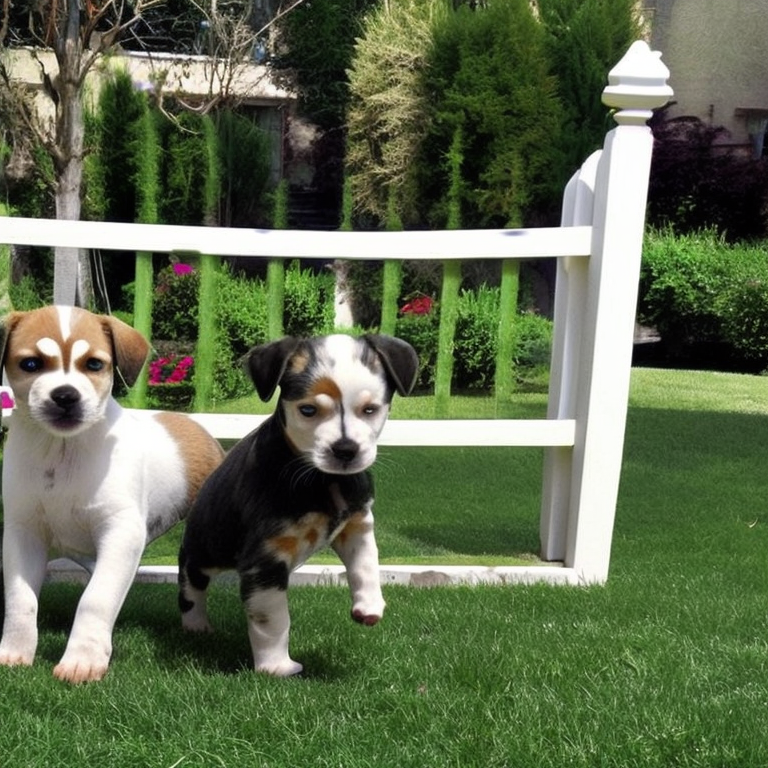

In [17]:
# Example
prompt = "a photo of two puppies playing in the back-yard of a mansion"
image_gen = pipe(prompt).images[0]
image_gen.save("puppies.jpg")
image_gen

# AI Generated Image

In [19]:
df_concat = pd.read_csv('Dataset_Preprocessed.csv')
df_concat = df_concat.drop(df_concat.columns[0], axis=1)

df_concat

username  followers  followees  is_verified  is_business  \
0     meganfox   21664800          0         True        False   
1     meganfox   21664800          0         True        False   
2     meganfox   21664800          0         True        False   
3     meganfox   21664800          0         True        False   
4     meganfox   21664800          0         True        False   
...        ...        ...        ...          ...          ...   
2666   billnye    2996685        110         True         True   
2667   billnye    2996685        110         True         True   
2668   billnye    2996685        110         True         True   
2669   billnye    2996685        110         True         True   
2670   billnye    2996685        110         True         True   

     business_category  number_of_posts  \
0                  NaN               40   
1                  NaN               40   
2                  NaN               40   
3                  NaN               40   
4                  NaN               40   
...                ...              ...   
2666               NaN              433   
2667               NaN              433   
2668               NaN              433   
2669               NaN              433   
2670               NaN              433   

                                               post_url  \
0     https://scontent-dfw5-1.cdninstagram.com/v/t51...   
1     https://scontent-dfw5-1.cdninstagram.com/v/t51...   
2     https://scontent-dfw5-2.cdninstagram.com/v/t51...   
3     https://scontent-dfw5-2.cdninstagram.com/v/t51...   
4     https://scontent-dfw5-1.cdninstagram.com/v/t51...   
...                                                 ...   
2666  https://instagram.fftw1-1.fna.fbcdn.net/v/t51....   
2667  https://instagram.fftw1-1.fna.fbcdn.net/v/t51....   
2668  https://instagram.fftw1-1.fna.fbcdn.net/v/t51....   
2669  https://instagram.fftw1-1.fna.fbcdn.net/v/t51....   
2670  https://instagram.fftw1-1.fna.fbcdn.net/v/t51....   

                                                caption hashtags      likes  \
0                            Kourtney and I are in love       []  4786649.0   
1     If I were the AP Literature teacher at Euphori...       []  4165277.0   
2                        the forest is my oldest friend       []  4155201.0   
3                             a fourth house taurus sun       []  4113889.0   
4                            It’s giving Dracula’s maid       []  4049193.0   
...                                                 ...      ...        ...   
2666  My modest telescope and a phone cam. Ours is a...       []   234544.0   
2667  Thoroughly enjoyed this morning’s conversation...       []   219879.0   
2668  AOC gets it. She sees that fear is dividing us...       []   215286.0   
2669                        Happy Valentine’s Day 🤷🏻‍♂️       []   195725.0   
2670  While here on Earth, Dr. Hawking made ponderin...       []   189337.0   

      comments location             date_utc      img_type  
0      16258.0      NaN  2021-09-13 20:17:32    GraphImage  
1      15630.0      NaN  2022-01-27 20:56:59  GraphSidecar  
2      24980.0      NaN  2023-07-15 19:17:48  GraphSidecar  
3      26495.0      NaN  2023-07-18 19:49:16  GraphSidecar  
4      15736.0      NaN  2022-02-09 17:16:59  GraphSidecar  
...        ...      ...                  ...           ...  
2666     989.0      NaN  2019-01-21 07:16:44    GraphImage  
2667    2585.0      NaN  2018-03-07 04:55:43    GraphImage  
2668    5656.0     SXSW  2019-03-10 00:39:58    GraphImage  
2669    2705.0      NaN  2019-02-15 01:54:30    GraphImage  
2670    1056.0      NaN  2018-03-14 23:43:34    GraphImage  

[2671 rows x 15 columns]

## Helper Functions

In [20]:
!pip install emoji

In [24]:
import pandas as pd
import numpy as np
import os
import glob
from tqdm import tqdm
from geopy.geocoders import Photon
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
from transformers import GPTNeoForCausalLM, GPT2Tokenizer
import torch
import emoji
import re
import cv2
#from google.colab.patches import cv2_imshow
from torchvision.io import read_image, ImageReadMode
import torch
from torchvision.io import read_image, ImageReadMode
import torchvision
from torchvision.models import vgg16, VGG16_Weights

In [28]:
def usernanme_encoding(usrn):
  return float(list(np.unique(df_concat['username'])).index(usrn) + 1)


def business_category_encoding(label):
  list_tmp = list(np.unique(list(df_concat['business_category'])))
  list_tmp.remove('nan')
  list_tmp.insert(0, 'nan')
  #list_tmp.remove('None')
  list_tmp.insert(1, 'None')
  return float(list_tmp.index(label))


def caption_tokenizer(tokenizer, caption):
  input_ids = tokenizer(caption,max_length=50, padding='max_length', truncation=True).input_ids
  return input_ids


def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.distinct_emoji_list(s))


def caption_encoding(tokenizer, caption):
  return caption_tokenizer(tokenizer, caption), len(extract_emojis(caption))


def clean_string(input_string):
    # Replace multiple spaces with a single space
    input_string = re.sub(r'\s+', ' ', input_string)

    # Remove everything except alphanumeric characters, underscores, and spaces
    return re.sub(r'[^\w\s]', '', input_string)


def hastags_count(has_list):
  has_list = clean_string(has_list)
  has_list = has_list.split(' ')
  if has_list == [''] : return 0.0
  else: return float(len(has_list))


def get_coordinates(address):
    if address == 'nan':
        return 0.0, 0.0

    geolocator = Photon(user_agent="measurements")

    try:
        location = geolocator.geocode(address)
        if location:
            return location.latitude, location.longitude
        else:
            return 0.0, 0.0
    except (GeocoderTimedOut, GeocoderUnavailable):
        return 0.0, 0.0


def date_encoding(full_date):
  date, hour = full_date.split(' ')
  d = pd.Timestamp(date) # Monday=0 ...

  dict_hour = {0.0: [6, 7, 8, 9, 10, 11, 12],     # Morning   -->  6 am to 12 pm
               1.0: [13, 14, 15, 16, 17],         # Afternoon --> 13 pm to  5 pm
               2.0: [18, 19, 20, 21],             # Evening   -->  6 pm to  9 pm
               3.0: [22, 23, 0, 1, 2, 3, 4, 5] }  # Night     -->  9 pm to  5 am

  whole_hour = int(hour.split(':')[0])
  minutes = int(hour.split(':')[1])
  seconds = int(hour.split(':')[2])

  if (seconds > 30) : minutes += 1
  if (minutes > 30) : whole_hour += 1
  if (whole_hour == 24) : whole_hour = 0

  for key in dict_hour.keys():
    if whole_hour in dict_hour[key] : return float(d.dayofweek), key


def image_type_encoding(img_type):
  return float(list(np.unique(df_concat['img_type'])).index(img_type))


def image_generator(model_VGG, weights, img_path, test_flag=0):
  img_org = cv2.imread(img_path, cv2.IMREAD_UNCHANGED) # original image

  if img_org is None:
    return np.zeros(1000).tolist()

  img_resized = resized = cv2.resize(img_org, (224,224), interpolation = cv2.INTER_AREA) # resize image to 224*224 to be used from VGG-16

  # filename = f"resizedImage-{img_path.strip('.jpg').split('/')[-1]}.jpg"
  filename = "resizedImage.jpg" if test_flag == 0 else "savedImage.jpg"
  cv2.imwrite(filename, img_resized)

  torch_img = read_image(filename,ImageReadMode.RGB)

  preprocess = weights.transforms()
  batch = preprocess(torch_img).unsqueeze(0)
  prediction = model_VGG(batch).squeeze(0).softmax(0)

  if test_flag == 0 : os.remove(filename)

  return prediction.tolist()

In [33]:
import cv2
from matplotlib import image as mpimg
def create_datapoint(pipe, model_VGG, weights, tokenizer, df_concat, prof_id, prompt_img, prompt_img_path, caption, has_list, loc, full_date, img_type):

  # Initialise datapoint list
  datapoint = []

  # Username
  datapoint.append(usernanme_encoding(prof_id))

  # Followers
  datapoint.append(float(list(df_concat[df_concat["username"] == prof_id]["followers"])[0]))

  # Followees
  datapoint.append(float(list(df_concat[df_concat["username"] == prof_id]["followees"])[0]))

  # Verification
  datapoint.append(float(list(df_concat[df_concat["username"] == prof_id]["is_verified"])[0]))

  # Business
  datapoint.append(float(list(df_concat[df_concat["username"] == prof_id]["is_business"])[0]))

  # Business Category
  datapoint.append(business_category_encoding(str(list(df_concat[df_concat["username"] == prof_id]["business_category"])[0])))

  # Posts
  datapoint.append(float(list(df_concat[df_concat["username"] == prof_id]["number_of_posts"])[0]))

  # Caption Token & Emojis Count
  cap_tokens, emoj_count = caption_encoding(tokenizer, caption)
  for j, tok in enumerate(cap_tokens, 1):
    datapoint.append(float(tok))
  datapoint.append(float(emoj_count))

  # Hashtags
  datapoint.append(hastags_count(has_list))

  # Latitude & Longitude
  lat, lon = get_coordinates(loc)
  # lat, lon = dict_addresses[loc]
  datapoint.append(lat)
  datapoint.append(lon)

  # Date and Time
  date, time = date_encoding(full_date)
  datapoint.append(date)
  datapoint.append(time)

  # Image Type
  datapoint.append(image_type_encoding(img_type))

  # Tensor Image

  image_gen = pipe(prompt_img).images[0]
  image_gen.save(prompt_img_path)

  #imageshow = mpimg.imread(image_gen)
  plt.imshow(image_gen)
  plt.show()

  vgg_img =  image_generator(model_VGG, weights, prompt_img_path)
  for feat_i in range(len(vgg_img)):
    datapoint.append(vgg_img[feat_i])

  return [datapoint]


## Test Example

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

unet\diffusion_pytorch_model.safetensors not found


Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.huggingface.co/repos/6b/20/6b201da5f0f5c60524535ebb7deac2eef68605655d3bbacfee9cce0087f3b3f5/c7da0e21ba7ea50637bee26e81c220844defdf01aafca02b2c42ecdadb813de4?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27diffusion_pytorch_model.bin%3B+filename%3D%22diffusion_pytorch_model.bin%22%3B&response-content-type=application%2Foctet-stream&Expires=1701979177&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwMTk3OTE3N319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy82Yi8yMC82YjIwMWRhNWYwZjVjNjA1MjQ1MzVlYmI3ZGVhYzJlZWY2ODYwNTY1NWQzYmJhY2ZlZTljY2UwMDg3ZjNiM2Y1L2M3ZGEwZTIxYmE3ZWE1MDYzN2JlZTI2ZTgxYzIyMDg0NGRlZmRmMDFhYWZjYTAyYjJjNDJlY2RhZGI4MTNkZTQ%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qJnJlc3BvbnNlLWNvbnRlbnQtdHlwZT0qIn1dfQ__&Signature=FwU9u9AjcDJVN-E4nXyqToHcMCkFlSi97kBD1jmeHovu9hebTVQoPC6lTVkY4BsHotavUic9W8y1CxyhjdAdZeQ2vIIHFqDL09F-2o46z5zSVf1csKqb12mG5ZGPwy3lLCZ0wcYfsAmUy

diffusion_pytorch_model.bin:  22%|##2       | 765M/3.44G [00:00<?, ?B/s]

pytorch_model.bin:  93%|#########3| 1.13G/1.22G [00:00<?, ?B/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

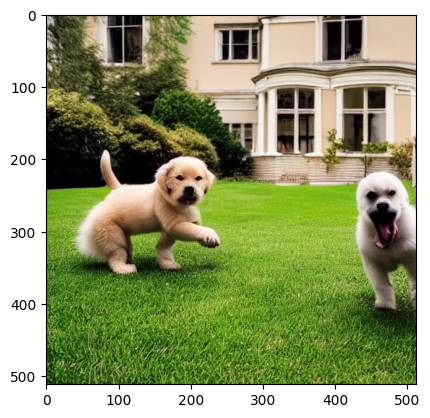

Predicted Likes: 2776260 & Predicted Comments: 30501


In [37]:
import torch
from torchvision.io import read_image, ImageReadMode
import torchvision
from torchvision.models import vgg16, VGG16_Weights
# Define VGG-16 Model & Weights
model_VGG = vgg16(pretrained=True)
model_VGG.eval()
weights = VGG16_Weights.DEFAULT

# Define Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-2.7B")
tokenizer.pad_token = tokenizer.eos_token

# Define Text_to_Img Model
model_id = "runwayml/stable-diffusion-v1-5"
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# Define Input Data
prof_id = 'meganfox'
prompt_img = "a photo of two puppies playing in the back-yard of a mansion"
prompt_img_path = "ai-gen-image.jpg"
caption = 'Little dogs playing 🐶🐶🐶' # Empty string: ' '
has_list = '[#dogs, #puppies]' # Empty string: '[]'
loc = 'New York' # Empty string: 'nan'
full_date = '2021-09-13 20:17:32'
img_type = 'GraphImage' # Options: ['GraphImage', 'GraphSidecar']


# Test-Example
test_sample = create_datapoint(pipe, model_VGG, weights, tokenizer, df_concat, prof_id, prompt_img, prompt_img_path, caption, has_list, loc, full_date, img_type)

pred_likes = int(model_like_FULL.predict(test_sample)[0])
pred_comments = int(model_comment_FULL.predict(test_sample)[0])

print(f'Predicted Likes: {pred_likes} & Predicted Comments: {pred_comments}')

## Test with RL

unet\diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


a photo of two puppies playing in the back-yard of a mansion by meganfox
Testing without RL finetune


  0%|          | 0/50 [00:00<?, ?it/s]

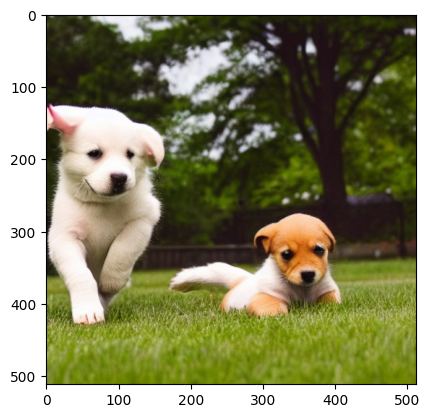

Predicted Likes: 2750088 & Predicted Comments: 20435


unet\diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Testing with RL finetune


  0%|          | 0/50 [00:00<?, ?it/s]

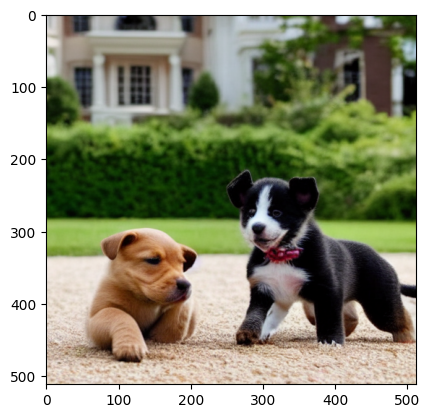

Predicted Likes: 2908933 & Predicted Comments: 18267


In [52]:
# Define VGG-16 Model & Weights
model_VGG = vgg16(pretrained=True)
model_VGG.eval()
weights = VGG16_Weights.DEFAULT

# Define Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-2.7B")
tokenizer.pad_token = tokenizer.eos_token

# Define Text_to_Img Model
lora_path = "checkpoint_1"
model_id = "runwayml/stable-diffusion-v1-5"
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
#pipe.unet.load_attn_procs(lora_path)
pipe = pipe.to("cuda")

# Define Input Data
prof_id = 'meganfox'
prompt_img = "a photo of two puppies playing in the back-yard of a mansion"
prompt_img_path = "ai-gen-image.jpg"
caption = 'Little dogs playing 🐶🐶🐶' # Empty string: ' '
has_list = '[#dogs, #puppies]' # Empty string: '[]'
loc = 'New York' # Empty string: 'nan'
full_date = '2021-09-13 20:17:32'
img_type = 'GraphImage' # Options: ['GraphImage', 'GraphSidecar']
print(f'{prompt_img} by {prof_id}')
print("Testing without RL finetune")
# Test-Example
test_sample = create_datapoint(pipe, model_VGG, weights, tokenizer, df_concat, prof_id, prompt_img, prompt_img_path, caption, has_list, loc, full_date, img_type)

pred_likes = int(model_like_FULL.predict(test_sample)[0])
pred_comments = int(model_comment_FULL.predict(test_sample)[0])

print(f'Predicted Likes: {pred_likes} & Predicted Comments: {pred_comments}')

pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe.unet.load_attn_procs(lora_path)
pipe = pipe.to("cuda")

print("Testing with RL finetune")
# Test-Example
test_sample = create_datapoint(pipe, model_VGG, weights, tokenizer, df_concat, prof_id, prompt_img, prompt_img_path, caption, has_list, loc, full_date, img_type)

pred_likes = int(model_like_FULL.predict(test_sample)[0])
pred_comments = int(model_comment_FULL.predict(test_sample)[0])

print(f'Predicted Likes: {pred_likes} & Predicted Comments: {pred_comments}')

unet\diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


a photo of Athens city mosaic in Museum by nytimes
Testing without RL finetune


  0%|          | 0/50 [00:00<?, ?it/s]

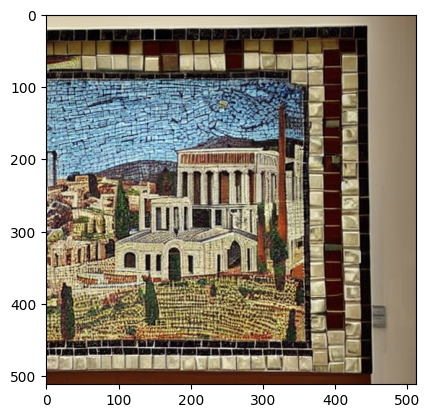

Predicted Likes: 627133 & Predicted Comments: 18220


unet\diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Testing with RL finetune


  0%|          | 0/50 [00:00<?, ?it/s]

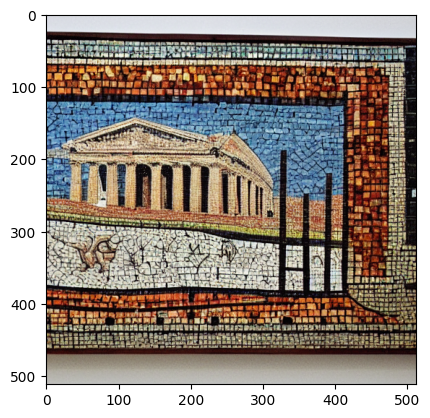

Predicted Likes: 832965 & Predicted Comments: 19658


In [51]:
# Define VGG-16 Model & Weights
model_VGG = vgg16(pretrained=True)
model_VGG.eval()
weights = VGG16_Weights.DEFAULT

# Define Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-2.7B")
tokenizer.pad_token = tokenizer.eos_token

# Define Text_to_Img Model
lora_path = "checkpoint_1"
model_id = "runwayml/stable-diffusion-v1-5"
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
#pipe.unet.load_attn_procs(lora_path)
pipe = pipe.to("cuda")

# Define Input Data
prof_id = 'nytimes'
prompt_img = "a photo of Athens city mosaic in Museum"
prompt_img_path = "ai-gen-image.jpg"
caption = 'What a beautiful city! 🏙' # Empty string: ' '
has_list = '[#Athens, #Greece]' # Empty string: '[]'
loc = 'Thessaloniki' # Empty string: 'nan'
full_date = '2023-09-13 20:17:32'
img_type = 'GraphImage' # Options: ['GraphImage', 'GraphSidecar']
print(f'{prompt_img} by {prof_id}')
print("Testing without RL finetune")
# Test-Example
test_sample = create_datapoint(pipe, model_VGG, weights, tokenizer, df_concat, prof_id, prompt_img, prompt_img_path, caption, has_list, loc, full_date, img_type)

pred_likes = int(model_like_FULL.predict(test_sample)[0])
pred_comments = int(model_comment_FULL.predict(test_sample)[0])

print(f'Predicted Likes: {pred_likes} & Predicted Comments: {pred_comments}')

pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe.unet.load_attn_procs(lora_path)
pipe = pipe.to("cuda")

print("Testing with RL finetune")
# Test-Example
test_sample = create_datapoint(pipe, model_VGG, weights, tokenizer, df_concat, prof_id, prompt_img, prompt_img_path, caption, has_list, loc, full_date, img_type)

pred_likes = int(model_like_FULL.predict(test_sample)[0])
pred_comments = int(model_comment_FULL.predict(test_sample)[0])

print(f'Predicted Likes: {pred_likes} & Predicted Comments: {pred_comments}')

unet\diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


newest 4090 GPU advertisement on a cool gaming PC with monitor by nvidiageforce
Testing without RL finetune


  0%|          | 0/50 [00:00<?, ?it/s]

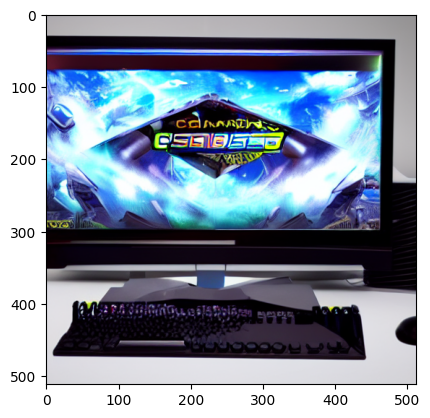

Predicted Likes: 154535 & Predicted Comments: 62938


unet\diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Testing with RL finetune


  0%|          | 0/50 [00:00<?, ?it/s]

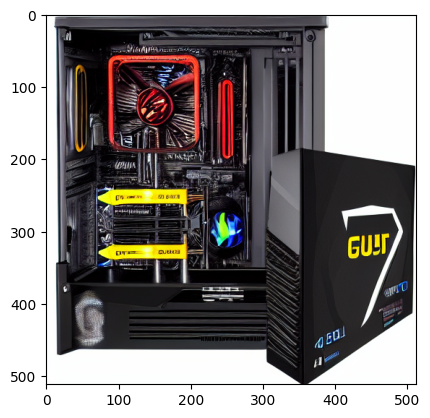

Predicted Likes: 101702 & Predicted Comments: 16977


In [50]:
# Define VGG-16 Model & Weights
model_VGG = vgg16(pretrained=True)
model_VGG.eval()
weights = VGG16_Weights.DEFAULT

# Define Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-2.7B")
tokenizer.pad_token = tokenizer.eos_token

# Define Text_to_Img Model
lora_path = "checkpoint_1"
model_id = "runwayml/stable-diffusion-v1-5"
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
#pipe.unet.load_attn_procs(lora_path)
pipe = pipe.to("cuda")

# Define Input Data
prof_id = 'nvidiageforce'
prompt_img = "newest 4090 GPU advertisement on a cool gaming PC with monitor"
prompt_img_path = "ai-gen-image.jpg"
caption = '4090 the best, ready for gaming' # Empty string: ' '
has_list = '[#Gaming, #Nvidia]' # Empty string: '[]'
loc = 'Palo Alto' # Empty string: 'nan'
full_date = '2023-09-13 20:17:32'
img_type = 'GraphImage' # Options: ['GraphImage', 'GraphSidecar']
print(f'{prompt_img} by {prof_id}')
print("Testing without RL finetune")
# Test-Example
test_sample = create_datapoint(pipe, model_VGG, weights, tokenizer, df_concat, prof_id, prompt_img, prompt_img_path, caption, has_list, loc, full_date, img_type)

pred_likes = int(model_like_FULL.predict(test_sample)[0])
pred_comments = int(model_comment_FULL.predict(test_sample)[0])

print(f'Predicted Likes: {pred_likes} & Predicted Comments: {pred_comments}')

pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe.unet.load_attn_procs(lora_path)
pipe = pipe.to("cuda")

print("Testing with RL finetune")
# Test-Example
test_sample = create_datapoint(pipe, model_VGG, weights, tokenizer, df_concat, prof_id, prompt_img, prompt_img_path, caption, has_list, loc, full_date, img_type)

pred_likes = int(model_like_FULL.predict(test_sample)[0])
pred_comments = int(model_comment_FULL.predict(test_sample)[0])

print(f'Predicted Likes: {pred_likes} & Predicted Comments: {pred_comments}')